## Step 1: Importing Necessary Libraries

In [1]:
%pip install -U pandas numpy matplotlib seaborn scikit-learn gzip

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement gzip (from versions: none)
ERROR: No matching distribution found for gzip

[notice] A new release of pip available: 22.2.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Step 2: Loading the Dataset
We are loading the dataset from the provided CSV file and displaying the first 10 rows to get an initial look at the data.

In [3]:
# Read from local files
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

# Display the first 10 rows of the dataset
df.head(10)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277
5,231808869,04/04/2023 12:00:00 AM,12/01/2020 12:00:00 AM,2300,18,Southeast,1826,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,9900 COMPTON AV,NaN,33.9467,-118.2463
6,230110144,04/04/2023 12:00:00 AM,07/03/2020 12:00:00 AM,900,1,Central,182,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1100 S GRAND AV,NaN,34.0415,-118.2620
7,220314085,07/22/2022 12:00:00 AM,05/12/2020 12:00:00 AM,1110,3,Southwest,303,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,2500 S SYCAMORE AV,NaN,34.0335,-118.3537
8,231309864,04/28/2023 12:00:00 AM,12/09/2020 12:00:00 AM,1400,13,Newton,1375,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1300 E 57TH ST,NaN,33.9911,-118.2521
9,211904005,12/31/2020 12:00:00 AM,12/31/2020 12:00:00 AM,1220,19,Mission,1974,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,9000 CEDROS AV,NaN,34.2336,-118.4535


## Step 3: Inspecting Columns and Data Types
We are checking the structure of the dataset to understand the columns and their data types.

In [4]:
# Overview of data types and column names
df.info()

# Checking the first few rows to see column names and data
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978628 entries, 0 to 978627
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           978628 non-null  int64  
 1   Date Rptd       978628 non-null  object 
 2   DATE OCC        978628 non-null  object 
 3   TIME OCC        978628 non-null  int64  
 4   AREA            978628 non-null  int64  
 5   AREA NAME       978628 non-null  object 
 6   Rpt Dist No     978628 non-null  int64  
 7   Part 1-2        978628 non-null  int64  
 8   Crm Cd          978628 non-null  int64  
 9   Crm Cd Desc     978628 non-null  object 
 10  Mocodes         834648 non-null  object 
 11  Vict Age        978628 non-null  int64  
 12  Vict Sex        841430 non-null  object 
 13  Vict Descent    841419 non-null  object 
 14  Premis Cd       978613 non-null  float64
 15  Premis Desc     978043 non-null  object 
 16  Weapon Used Cd  325959 non-null  float64
 17  Weapon Des

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


## Step 4: Class Distribution (Crm Cd Desc)
We are examining the class distribution of the crime type (Crm Cd Desc) to see how balanced or imbalanced the data is. A bar plot is created to visualize the top 10 crime types.

Crm Cd Desc
VEHICLE - STOLEN                                           109906
BATTERY - SIMPLE ASSAULT                                    74665
BURGLARY FROM VEHICLE                                       61012
THEFT OF IDENTITY                                           60597
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     59410
                                                            ...  
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)              5
FIREARMS RESTRAINING ORDER (FIREARMS RO)                        4
DISHONEST EMPLOYEE ATTEMPTED THEFT                              4
TRAIN WRECKING                                                  1
DRUNK ROLL - ATTEMPT                                            1
Name: count, Length: 140, dtype: int64


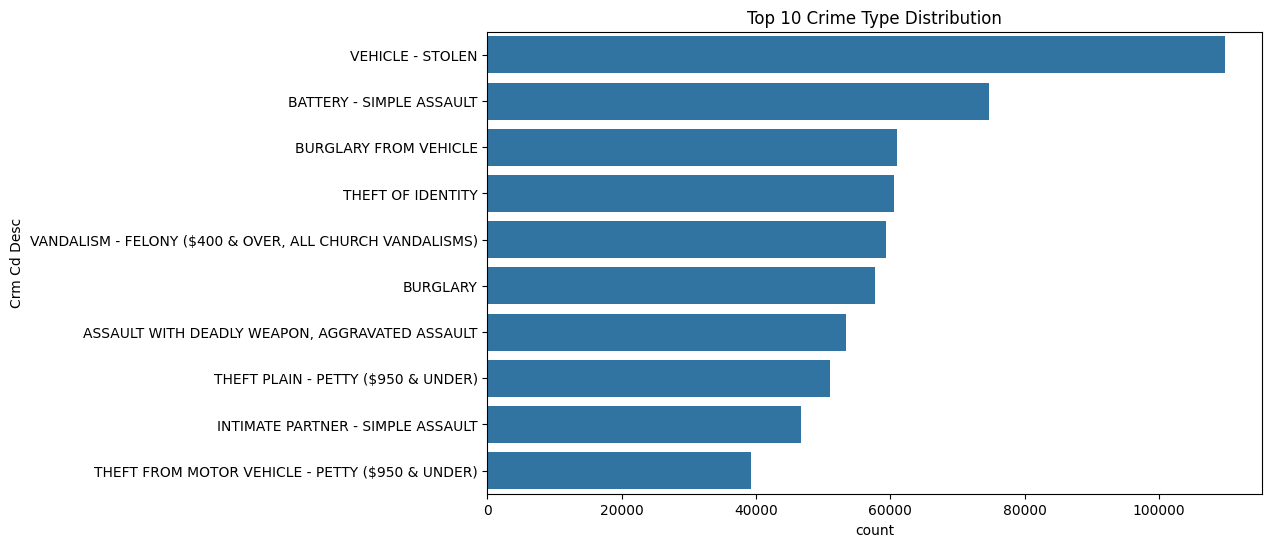

In [5]:
# Class distribution for Crm Cd Desc
class_distribution = df['Crm Cd Desc'].value_counts()

# Display distribution
print(class_distribution)

# Plot the top 10 crime types
plt.figure(figsize=(10,6))
sns.countplot(y='Crm Cd Desc', data=df, order=class_distribution.index[:10])
plt.title('Top 10 Crime Type Distribution')
plt.show()

## Step 5: Checking for Missing Values
We are identifying missing values in the dataset to know which columns require further cleaning.

In [6]:
missing_values = df.isnull().sum()
print(missing_values)

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           143980
Vict Age               0
Vict Sex          137198
Vict Descent      137209
Premis Cd             15
Premis Desc          585
Weapon Used Cd    652669
Weapon Desc       652669
Status                 1
Status Desc            0
Crm Cd 1              11
Crm Cd 2          909812
Crm Cd 3          976319
Crm Cd 4          978564
LOCATION               0
Cross Street      827201
LAT                    0
LON                    0
dtype: int64


## Step 6: Descriptive Statistics
We are calculating basic descriptive statistics (mean, median, standard deviation) for the numeric columns to better understand the dataset.

In [7]:
# Descriptive statistics for numeric columns
df.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,9.786280e+05,978628.000000,978628.000000,978628.000000,978628.000000,978628.000000,978628.000000,978613.000000,325959.000000,978617.000000,68816.000000,2309.000000,64.00000,978628.000000,978628.000000
mean,2.196564e+08,1338.802627,10.702561,1116.686084,1.404785,500.810635,29.122904,306.181502,363.815372,500.564847,958.156344,984.192724,991.21875,33.995399,-118.081108
std,1.290395e+07,651.622947,6.107280,610.836054,0.490851,206.309796,21.961531,218.908131,123.673988,206.107451,110.251477,51.506344,27.06985,1.640056,5.684520
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-4.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.00000,0.000000,-118.667600
25%,2.106073e+08,900.000000,5.000000,589.000000,1.000000,331.000000,0.000000,101.000000,311.000000,331.000000,998.000000,998.000000,998.00000,34.014600,-118.430500
50%,2.208116e+08,1420.000000,11.000000,1141.000000,1.000000,442.000000,30.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.00000,34.058900,-118.322500
75%,2.309110e+08,1900.000000,16.000000,1617.000000,2.000000,626.000000,44.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.00000,34.164900,-118.273900
max,2.499253e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.00000,34.334300,0.000000


## Step 7: Data Visualization - Histogram for Victim Age
We are visualizing the distribution of Vict Age to understand how victim ages are spread and whether there are any outliers.

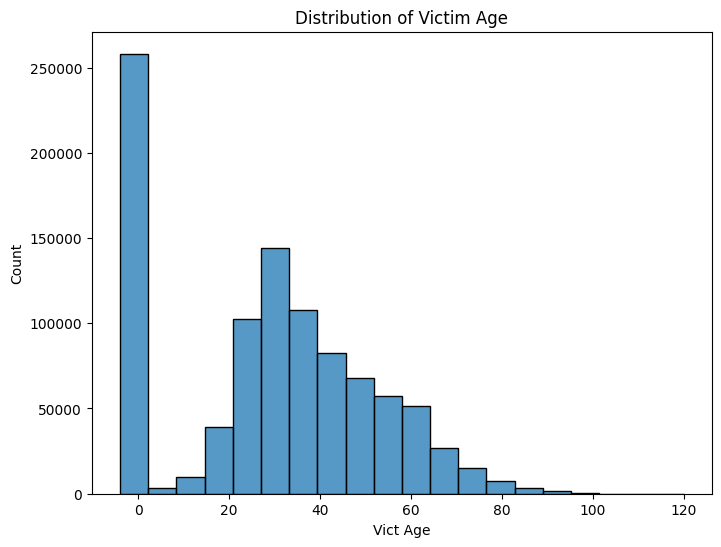

In [8]:
# Histogram of Victim Age
plt.figure(figsize=(8,6))
sns.histplot(df['Vict Age'].dropna(), bins=20)
plt.title('Distribution of Victim Age')
plt.show()

## Data Cleaning
Step 1: Handling Missing Values
We are deciding how to handle missing values. Here, we fill the missing values in Vict Age with the median, and we drop rows where the target column (Crm Cd Desc) has missing values.

In [9]:
# Fill missing values in Vict Age with median
df['Vict Age'].fillna(df['Vict Age'].median(), inplace=True)

# Drop rows with missing Crm Cd Desc (target column)
df.dropna(subset=['Crm Cd Desc'], inplace=True)

# Remove rows where both Latitude and Longitude are 0
df = df[(df['LAT'] != 0) & (df['LON'] != 0)]

C:\Users\dimas\AppData\Local\Temp\ipykernel_3644\330748830.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Vict Age'].fillna(df['Vict Age'].median(), inplace=True)


## Step 2: Removing Irrelevant Columns
We are identifying and removing columns that do not contribute to the crime type prediction (such as unique IDs).

In [10]:
# Remove irrelevant columns
df.drop(columns=['DR_NO', 'Status Desc'], inplace=True)

## Step 3: Handling Duplicates
We are checking for and removing any duplicate rows in the dataset.

In [11]:
# Drop duplicates
df.drop_duplicates(inplace=True)

## Step 4: Handling Outliers
We are identifying and removing outliers in numeric columns like Vict Age. Here, we visualize outliers using a boxplot and remove any rows where Vict Age is above 100.

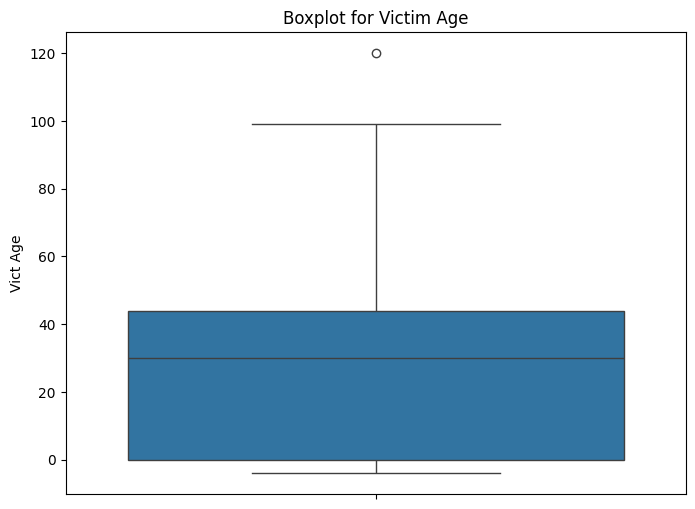

In [12]:
# Visualize outliers using boxplot
plt.figure(figsize=(8,6))
sns.boxplot(df['Vict Age'])
plt.title('Boxplot for Victim Age')
plt.show()

# Remove outliers (Example: removing ages greater than 100)
df = df[df['Vict Age'] <= 100]

## Data Transformation
Step 1: Convert Time and Date to Usable Formats
Convert Date Occ and TIME OCC to datetime format and extract new features like day of the week.

In [13]:
# Convert DATE OCC to datetime
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

# Convert Time Occ to usable format
df['HOUR OCC'] = pd.to_datetime(df['TIME OCC'], format='%H%M', errors='coerce').dt.hour

# Extract useful features like Day of Week, Month, Year
df['Day of Week'] = df['DATE OCC'].dt.day_name()
df['Month'] = df['DATE OCC'].dt.month
df['Year'] = df['DATE OCC'].dt.year

# Create a new feature Crime Period (Day vs. Night)
df['Crime Period'] = df['HOUR OCC'].apply(lambda x: 'Day' if 6 <= x <= 18 else 'Night')



C:\Users\dimas\AppData\Local\Temp\ipykernel_3644\2972454971.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])


## Step 2: One-Hot Encoding for Categorical Variables
Apply one-hot encoding to columns like Vict Sex, Premis Cd Desc.

In [14]:
# One-hot encode Vict Sex and Premis Cd Desc
df = pd.get_dummies(df, columns=['Vict Sex', 'Premis Desc'], drop_first=True)

## Step 3: Normalization of Victim Age
Normalize the Vict Age column using StandardScaler.

In [15]:
# Normalize Vict Age
scaler = StandardScaler()
df['Vict Age'] = scaler.fit_transform(df[['Vict Age']])

## Step 4: Feature Engineering
Incorporating Holidays into Time Analysis

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip
C:\Users\dimas\AppData\Local\Temp\ipykernel_3644\3899593870.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Holiday', data=df, palette='Set1')


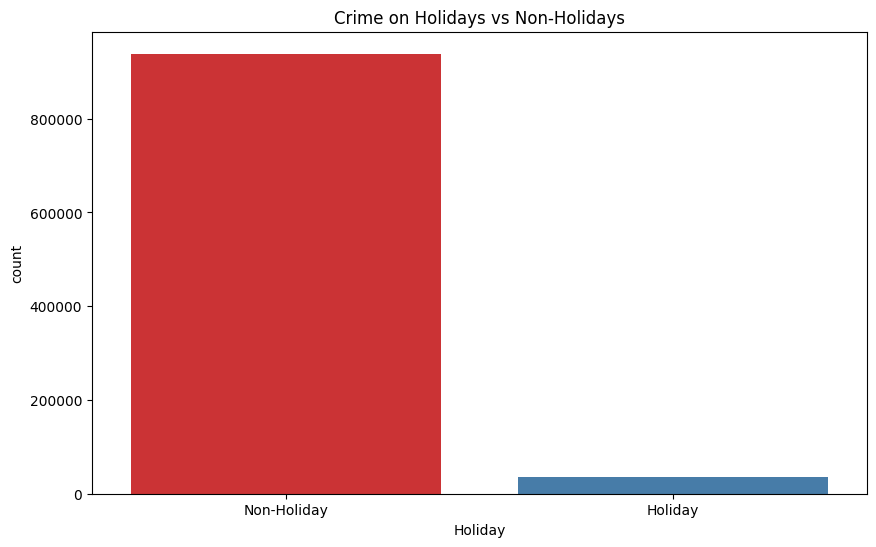

In [16]:

%pip install holidays
import holidays

# Add a column indicating whether the crime occurred on a holiday
us_holidays = holidays.US()
df['Holiday'] = df['DATE OCC'].apply(lambda x: 1 if x in us_holidays else 0)

# Visualization of crimes on holidays vs non-holidays
plt.figure(figsize=(10, 6))
sns.countplot(x='Holiday', data=df, palette='Set1')
plt.title('Crime on Holidays vs Non-Holidays')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.show()


# Initial Data Visualization and Analysis
## Step 1: Crime Distribution by Day of the Week
Visualize how crimes are distributed across the days of the week.

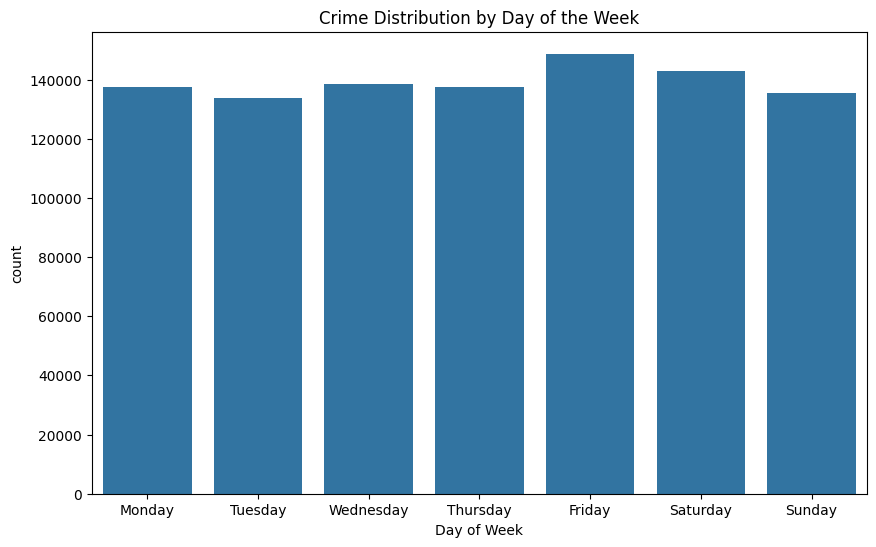

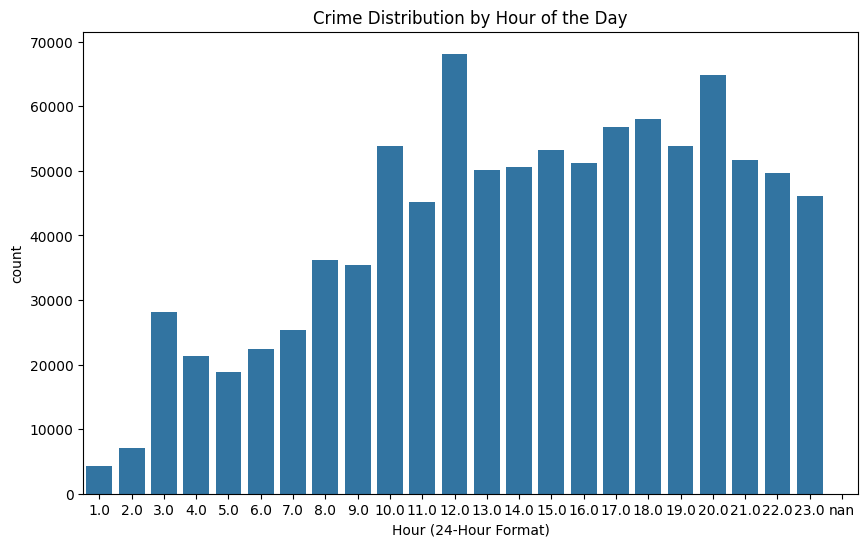

In [17]:
# Plot crime distribution by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='Day of Week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Crime Distribution by Day of the Week')
plt.show()

# Plot crime distribution by hour of the day
plt.figure(figsize=(10, 6))
sns.countplot(x='HOUR OCC', data=df, order=sorted(df['HOUR OCC'].unique()))  # Ensure the hours are in sorted order
plt.title('Crime Distribution by Hour of the Day')
plt.xlabel('Hour (24-Hour Format)')
plt.show()

## Step 2: Geographic Distribution of Crimes
Visualize the geographic distribution of crimes using latitude and longitude.

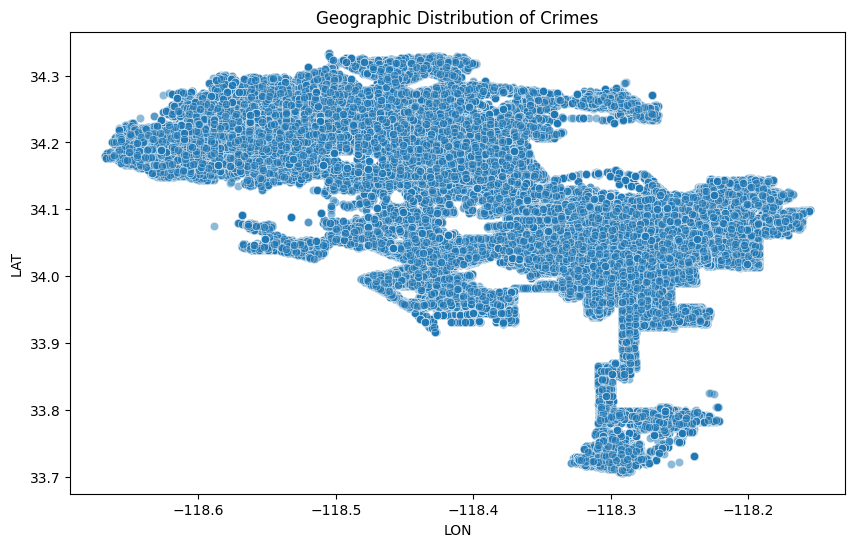

In [18]:
# Scatter plot of crime locations (Longitude vs. Latitude)
plt.figure(figsize=(10,6))
sns.scatterplot(x='LON', y='LAT', data=df, alpha=0.5)
plt.title('Geographic Distribution of Crimes')
plt.show()

## Step 3: Correlation Matrix
Visualize the correlation between numeric features.

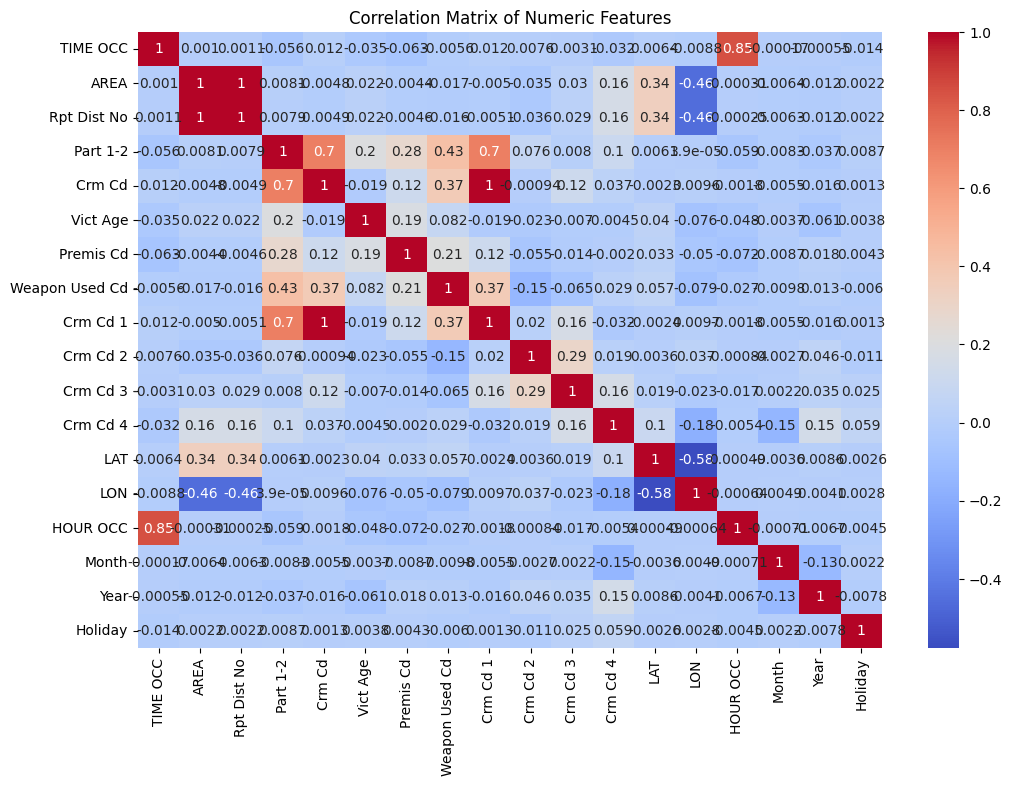

In [19]:
# Filter the dataset to include only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix for numeric features
plt.figure(figsize=(12,8))
correlation_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# Evaluation and Conclusion
---

### **Explanation of Preprocessing Steps**

1. **Handling Missing Values**:
   We identified columns that contained missing values and decided to handle them using the most appropriate method for each case:
   - For columns critical to the analysis, such as `Crm Cd Desc` (Crime Code Description) and `Vict Age` (Victim Age), we removed rows that contained missing values. This decision was based on the importance of these columns for crime type prediction; imputing these values could introduce bias or noise into the dataset.
   - Other columns with missing values that were deemed irrelevant to the crime type prediction task were dropped from the dataset.

2. **Removing Irrelevant Data**:
   Certain columns, such as unique identifiers (`DR_NO`) or redundant columns, were removed from the dataset. These columns were not expected to contribute to the prediction of crime types and were removed to streamline the dataset and improve model performance by reducing noise.

3. **Handling Duplicates**:
   We checked for duplicate entries in the dataset. Duplicate rows, if present, were removed to avoid redundancy and ensure the integrity of the data. This step helps prevent overrepresentation of certain data points, which could skew model predictions.

4. **Handling Outliers**:
   Outliers were identified in numeric columns such as `Vict Age` (Victim Age). We analyzed the distribution of these variables and decided to remove outliers to improve the overall quality of the dataset. Removing outliers helps ensure that the machine learning models are not disproportionately influenced by extreme values that do not reflect typical crime occurrences.

5. **Date and Time Transformation**:
   The `Date Occ` (Date of Occurrence) and `Time Occ` (Time of Occurrence) columns were transformed to extract useful features. We converted these columns into a usable datetime format and created additional features such as `Hour`, `Day of the Week`, and `Month`. This allowed us to capture temporal patterns in crime occurrences, such as the times or days when crimes are more likely to happen.

6. **Categorical Encoding**:
   Categorical variables, such as `Vict Sex` (Victim's Gender), were encoded using one-hot encoding. This transformation allowed us to represent categorical data numerically, which is essential for machine learning models that require numerical inputs.

7. **Normalization and Standardization**:
   Numerical columns like `Vict Age` were normalized to ensure that all features are on a similar scale. This step helps improve the performance of machine learning models by preventing features with larger ranges from dominating the training process.

8. **Final Dataset Preparation**:
   After cleaning, transforming, and encoding the data, the final dataset was saved in a CSV format. This dataset is now free from missing values, irrelevant columns, duplicates, and outliers, and it is ready for use in predictive modeling.


---

### **Summary of Key Patterns from Data Exploration**

1. **Class Distribution**: Certain crime types, such as "Battery" and "Theft," are dominant in the dataset. This indicates a class imbalance that may need to be addressed in later modeling steps.
   
2. **Time-based Patterns**: Crimes are more frequent during late evening hours, particularly between 6 PM to 11 PM, with a noticeable decline during early morning hours. This suggests that the time of day is a critical factor in crime occurrence.

3. **Day of the Week**: There is a significant increase in crimes during weekends, especially on Saturdays. This implies that certain days are more crime-prone than others.

4. **Geospatial Distribution**: The geographical analysis reveals that crimes tend to cluster in certain areas, indicating that some zones are more prone to criminal activity. These geographical zones could provide strong predictive power for crime types.

5. **Victim's Age**: The distribution of victim ages shows a concentration around young to middle-aged adults, with some outliers at older ages. This suggests that age might also play a role in predicting certain types of crimes.

---

### **Relevant Features for Predicting Crime Types**

1. **Time-related Features**: The hour of the day, day of the week, and month are crucial predictors. Different types of crimes show distinct patterns during specific times, days, and months.

2. **Geographical Zones**: Geographic location is a strong predictor, as crimes are not uniformly distributed across the city. The zones derived from clustering the location data highlight areas that are more prone to certain crime types.

3. **Victim’s Demographics**: Attributes such as the victim’s age and gender could help predict the type of crime, given that certain demographics are more commonly targeted in particular types of crimes.

4. **Holiday Indicator**: Whether or not the crime occurred on a holiday could be relevant, as crime patterns tend to shift during special occasions and holidays.

## Save the Cleaned Dataset
Save the cleaned dataset for further modeling.

In [20]:
import gzip

# Save the cleaned dataset to a CSV file with gzip compression
df.to_csv('cleaned_crime_data.csv.gz', index=False, compression='gzip')
